#### Types of Supervised Learning
Logistic regression
Naive Bayes classifier
Support vector machines
K- nearest neighbor
Decision trees
Neural networks

### Logistic Regression

This predicts probability of event.
Fits the data into to a logic operation.
Its values are always between 0 and 1.
The fxns are a nutral log of probability i.e base 10

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Downloads/heart.csv")

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

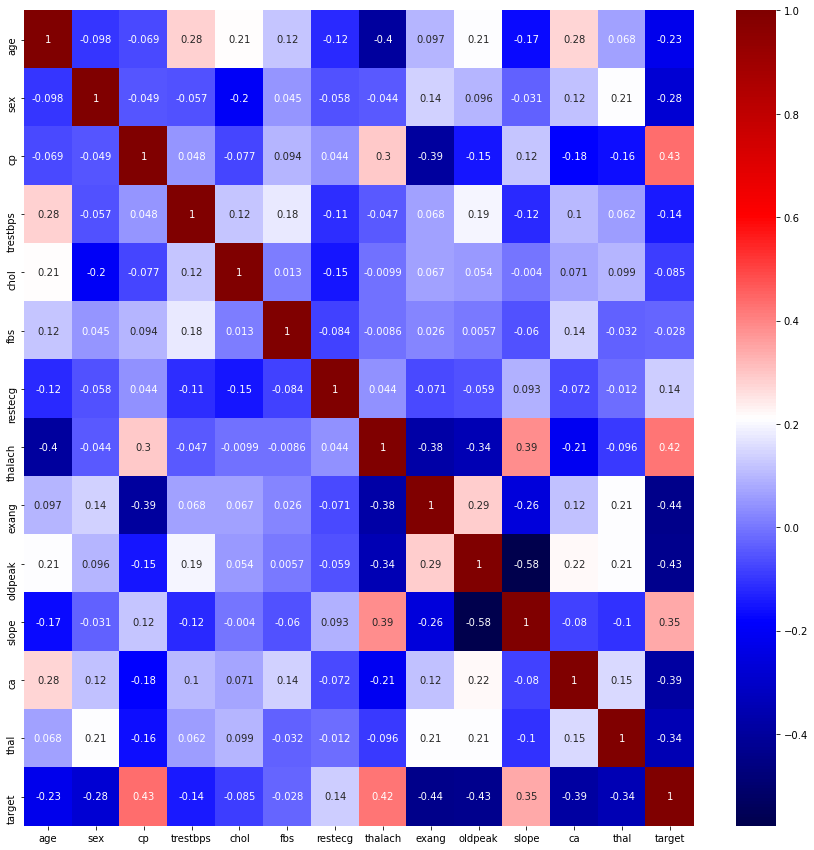

In [29]:
#checking correlation
cor = df.corr() 
cor_feat = cor.index
plt.figure(figsize= (15,15))

#plot heat map
g=sns.heatmap(df[cor_feat].corr(), annot=True, cmap="seismic")


Correlation table showing correlated features. values close to 1 mean there is positive correlation while close to -1 is negative correlation. Close to 0 means no correlation

#### Normalization

technique used in data preparation to change values of numeric columns in the dataset to use a common scale. this is done when features have different ranges.  eg in our data above, some have 1 and 0, while some have 140 etc

In [40]:
y = df.target.values  #values convert values onto numpy array
x_data = df.drop(["target"], axis = 1) #except target, the other columns are our x data   Also axis = 1 meand it is dropping from column. axis = 0 will be to drop a row

In [42]:
#this step normalises the rest of the data to be closer to 0 and 1
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

#### Splitting Dataset

before building a model, the data needs to be split into training and test data. The test data determines the performance of the model after learning on the train data

In [43]:
from sklearn.model_selection import train_test_split  #lib from scikit-learn that splits dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  #test_size here follws the 80:20 split, you can use any proprtion based on the size of your data

In [44]:
from sklearn.linear_model import LogisticRegression  #import algorithm for training the model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#import the evaluation metrics

In [14]:
model = LogisticRegression(penalty='none') #initializing model
model.fit(x_train, y_train)  #fitting the model
y_pred = model.predict(x_test)  #prediction

#### Confususion Matrix

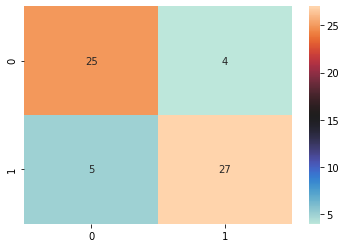

In [15]:
cm =  confusion_matrix(y_test, y_pred)
viz = sns.heatmap(cm, annot=True, cmap= "icefire")

interpretation
TP = 25, FP = 4
FN = 5, TN = 27

In [16]:
precision_score(y_test, y_pred)

0.8709677419354839

In [17]:
recall_score(y_test, y_pred)

0.84375

In [18]:
f1_score(y_test, y_pred)

0.8571428571428571

In [19]:
accuracy_score(y_test, y_pred)

0.8524590163934426